## 特征匹配
Brute-Force匹配器和FLANN匹配器
### 1. Brute-Force匹配器
Brute-Force匹配器是最简单的匹配器，它会简单地计算特征集合中的每个特征向量之间的距离，然后返回最佳匹配。这种匹配器的好处是它非常简单，非常快，但是它的缺点是它的结果受到噪声的影响，如果有很多错误的匹配，它就不能很好地工作。在这种情况下，我们可以使用RANSAC算法来排除错误的匹配。
### 2. FLANN匹配器
FLANN代表快速最近邻居搜索库，它是一个对大数据集和高维特征进行最近邻搜索的算法的集合，而且这些算法都已经被优化过了。在某些情况下，它比Brute-Force匹配器更快。我们将在下一节中看到它的使用方法。





<class 'tuple'>
149
80.0
4
126
0


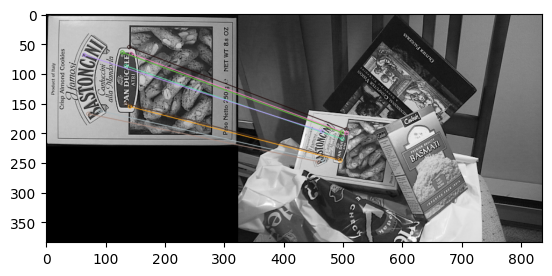

(<matplotlib.image.AxesImage at 0x1bcead217d0>, None)

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('../data/box.png',cv.IMREAD_GRAYSCALE)          # 索引图像
img2 = cv.imread('../data/box_in_scene.png',cv.IMREAD_GRAYSCALE) # 训练图像
# 初始化ORB检测器
orb = cv.ORB_create()
# 基于ORB找到关键点和检测器
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# 创建BF匹配器的对象
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True) 
# 匹配描述符.
matches = bf.match(des1,des2) 
#查看matches的数据类型以及长度
print(type(matches))
print(len(matches))
#打印第一组数据
print(matches[0].distance)
print(matches[0].queryIdx)
print(matches[0].trainIdx)
print(matches[0].imgIdx)


# 根据距离排序
matches = sorted(matches, key = lambda x:x.distance) 
# 绘制前10的匹配项
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

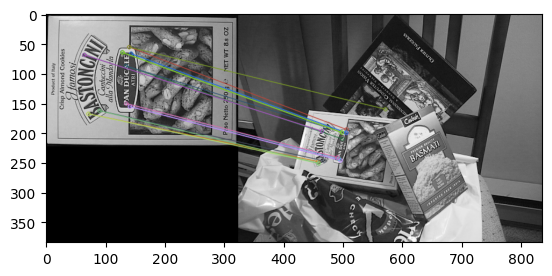

(<matplotlib.image.AxesImage at 0x1bceaddcc10>, None)

In [15]:
#FLANN匹配器
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('../data/box.png',cv.IMREAD_GRAYSCALE)          # 索引图像
img2 = cv.imread('../data/box_in_scene.png',cv.IMREAD_GRAYSCALE) # 训练图像
# 初始化ORB检测器
orb = cv.ORB_create()
# 基于ORB找到关键点和检测器
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# FLANN匹配器参数
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                     table_number = 6, # 12
                        key_size = 12,     # 20
                            multi_probe_level = 1) #2
search_params = dict(checks=50)   # 指定递归次数
# 创建FLANN匹配器的对象
flann = cv.FlannBasedMatcher(index_params,search_params)
# 匹配描述符.
matches = flann.knnMatch(des1,des2,k=2)
# 根据距离排序
matches = sorted(matches, key = lambda x:x[0].distance)
# 绘制前10的匹配项
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

